<img src='logo.png' style='display: block;height: 61px;float: left;padding: .75rem 1.25rem;'>

# Desafío - Mecanismos de Votación
* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y `csv`).
* Una vez terminado el desafío, comprime la carpeta y sube el `.zip` a la seccióncorrespondiente.

## Descripción


Para esta actividad desarrollaremos un ensamble heterogéneo que prediga la popularidad o inpopularidad de contenido en línea de un sitio web. El archivo csv tiene un total de 39797 registros, donde cada uno representa características del artículo publicado en el sitio web. Cada registro tiene un total de 61 atributos que miden características del texto, cantidad de imágenes, keywords, etc. Los artículos provienen de la publicación K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal. Los artículos registrados son de la página web www.mashable.com.

Más información sobre los atributos se puede encontrar en el archivo `OnlineNewsPopularity.name`.

## Ejercicio 1: Preprocesamiento

* A continuación se le presenta un código que agrupa las variables por grupos. Cada uno de éstos hace referencia a alguna característica de los registros en la base de datos. Genere una análisis descriptivo de cada uno de los atributos. Puede utilizar la función grid_plot_batch que se encuentra en el archivo helpers.py .

> Se utilizan librerías bases para el tratamiento de datos y algunos aspectos básicos de cálculo y gráficos.

In [1]:
# Se importa libreria para el manejo de bases de datos
import pandas as pd
# Se importa libreria para el manejo de operaciones de cálculo
import numpy as np
# Se importa libreria para el manejo de gráficos
import matplotlib.pyplot as plt
# Se importa libreria para manejo de funciones estadisticas y probabilidades
import seaborn as sns
# Librería para visualizar patrones de datos perdidos
import missingno as msngo
# Se importa libreria para el menejo de warning
import warnings
# Se importa libreria para el trabajo de expresiones reguilares
import re

> Definimos algunos aspectos de ambiente y valores por defecto de visualización.

In [2]:
# Por defecto, matplotlib crea una figura en una ventana separada.
# podemos hacer que las figuras aparezcan en línea dentro del notebook; lo hacemos ejecutando:
%matplotlib inline
# Se ignoran los warning para evitar suciedad en la ejecución
warnings.filterwarnings(action='ignore')
# Se define el estilo de gráficos a usar
plt.style.use('seaborn-pastel')
# Se define el tamaño de los paños de los gráficos por defecto
plt.rcParams['figure.figsize'] = (14, 8)
# Dado que vamos a supervisar datos no limitaremos la cantidad de columnas a mostrar en el despliegue del dataframe
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

> Se utiliza <strong>librería propia</strong> que continen funciones auxiliares, necesarias para el desarrollo de desafíos.

In [3]:
# Se importa libreria con funciones auxiliares
import ancilliary_funcs as afx
import lec10_graphs as lecfx

> Se utiliza <strong>librería helpers.py</strong> que continen funciones auxiliares, necesarias para el desarrollo de desafíos.

In [4]:
import helpers as hlp

> Se utilizan librerías <strong>sklearn</strong> para el modelo, el tratamiento de escala de valores de los atributos y seleccion de set de datos:

In [5]:
from sklearn.decomposition import PCA
# Módulos de preprocesamiento
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Módulos de modelos
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

> Cargamos la base de datos

In [6]:
# Se carga la base de datos y se elimina la columna 'Unnamed: 0' que no aporta valor al análisis.
df = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')

In [7]:
# Inspeccionamos los nombres de las columnas
print([i for i in df.columns])

['url', ' timedelta', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global_rate_negative_words', ' rate_positive_words', '

In [8]:
# las etiquetas de las columnas presentan un espacio extra, con ésto lo podemos eliminar
df.columns = [i.replace(' ', '') for i in df.columns]

In [9]:
print([i for i in df.columns])

['url', 'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', '

In [10]:
df.sample(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
27250,http://mashable.com/2014/06/18/fab-buys-furnit...,204.0,9.0,218.0,0.562500,1.0,0.735537,1.0,1.0,1.0,...,0.136364,0.80,-0.125000,-0.125000,-0.125000,0.833333,0.316667,0.333333,0.316667,900
33499,http://mashable.com/2014/09/26/bendgate-apple-...,104.0,10.0,505.0,0.533066,1.0,0.688312,8.0,6.0,1.0,...,0.100000,0.70,-0.212500,-0.400000,-0.100000,0.100000,0.000000,0.400000,0.000000,578
26781,http://mashable.com/2014/06/11/google-my-busin...,211.0,12.0,817.0,0.535354,1.0,0.661232,18.0,4.0,0.0,...,0.100000,1.00,-0.243849,-0.600000,-0.050000,0.400000,-0.150000,0.100000,0.150000,7100
31414,http://mashable.com/2014/08/25/drone-beat-amaz...,136.0,8.0,87.0,0.807229,1.0,0.918367,1.0,1.0,0.0,...,0.250000,0.35,-0.155556,-0.155556,-0.155556,0.000000,0.000000,0.500000,0.000000,485
15548,http://mashable.com/2013/11/02/top-10-tech-thi...,432.0,10.0,650.0,0.524834,1.0,0.620283,22.0,0.0,1.0,...,0.100000,1.00,-0.352778,-0.600000,-0.125000,0.500000,0.500000,0.000000,0.500000,4400


In [11]:
# eliminamos el string de url que no sirve para el análisis
df.drop(columns=['url', 'timedelta'], inplace=True)

In [12]:
# generamos el conjunto de variables
qnty = df.filter(regex='^n_', axis=1)
channel = df.filter(regex='^data_', axis=1)
days = df.filter(regex=re.compile("weekday|weekend"), axis=1)
# Agregamos polaridad que no estaba en el código que se nos entregó
sentiments = df.filter(regex=re.compile("negative|positive|subjectivity|polarity"), axis=1)
lda = df.filter(regex='^LDA_\d', axis=1)
keywords = df.filter(regex='^kw_', axis=1)

* Describa el comportamiento de las variables.

> __qnty__

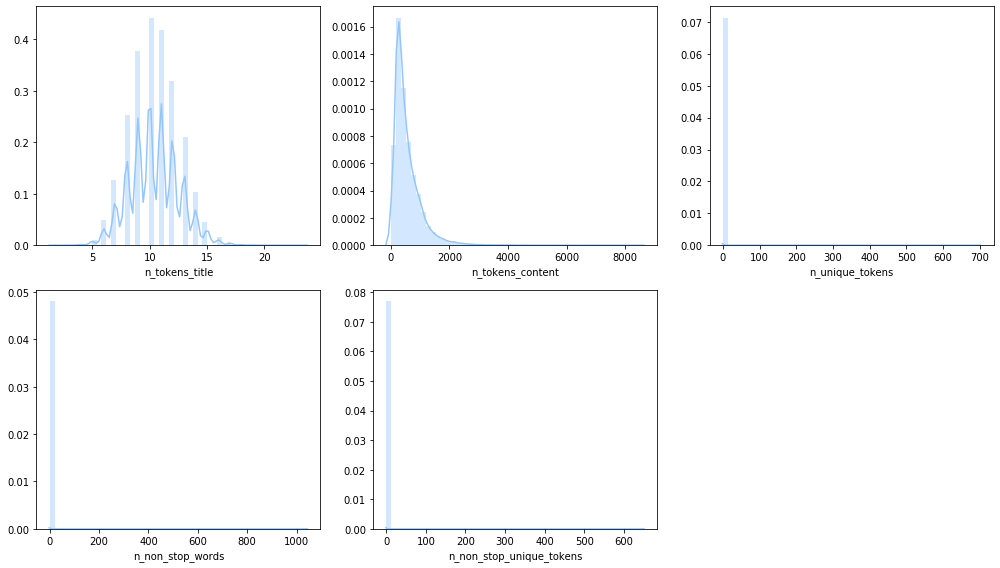

In [13]:
hlp.grid_plot_batch(qnty, 3, sns.distplot)

Podemos ver que la distribución de "número de palabras en el título (__n_tokens_title__)" tiene una forma normal con media en torno a las 10 palabras.

El caso de "número de palabras en el cuerpo (__n_tokens_content__)" está desbalanceado en torno a 0, lo que nos tienta a aplicar logaritmo a la variable, no obstante la dejaremos como tal.

Para el caso de __n_unique_tokens__, __n_non_stop_words__, __n_non_stop_unique_tokens__ vemos una fuerte carga en 0 y una correlación aparente entre las variables.

> __channel__

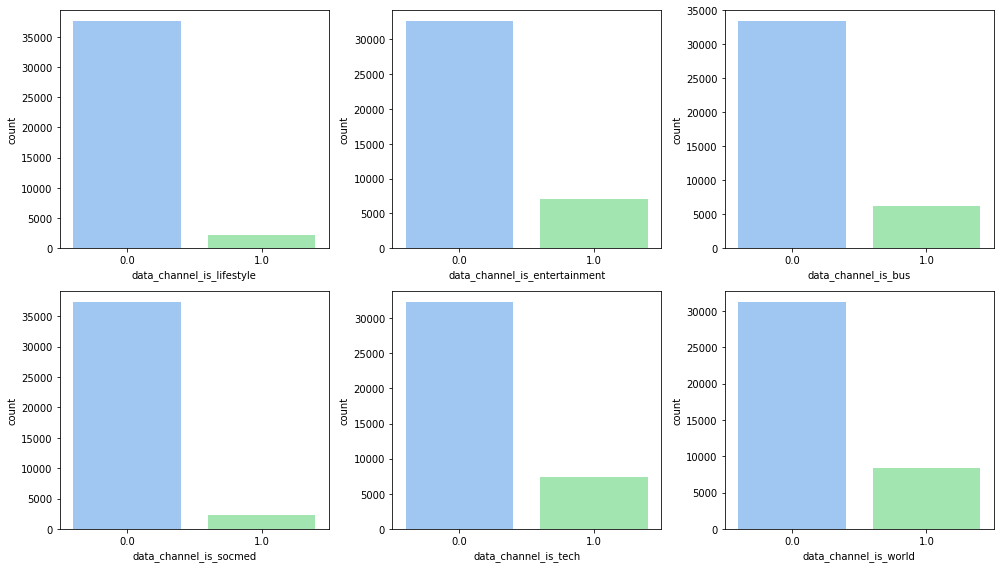

In [14]:
hlp.grid_plot_batch(channel, 3, sns.countplot)

El grupo de atributos __channel__ son variables binarias y representan una temática en particular. No podemos determinar visualmente una correlación, pero más adelante vamos a revisarlo.

> __days__

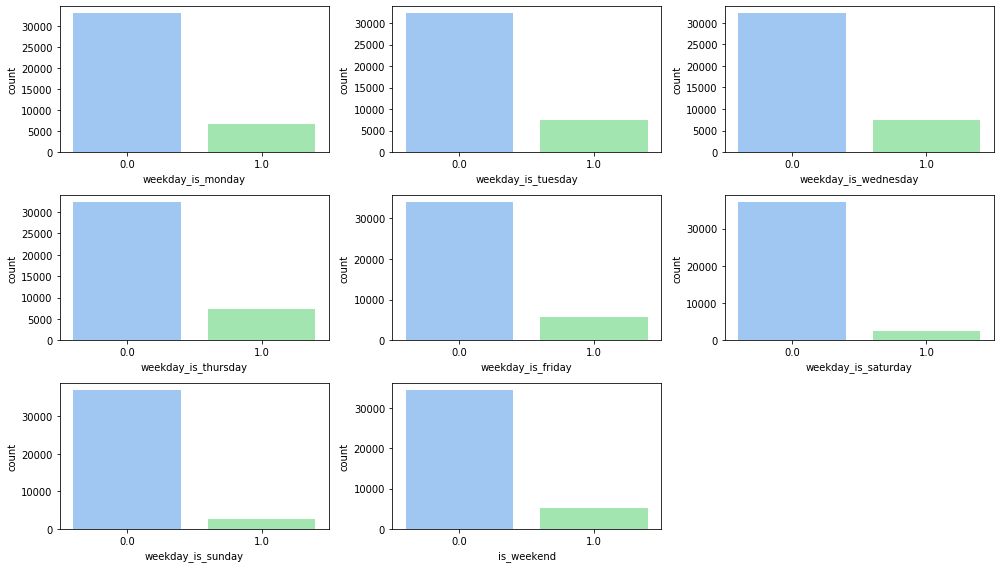

In [15]:
hlp.grid_plot_batch(days, 3, sns.countplot)

El grupo de atributos __days__ son variables binarias e indican el día de la semana que fue publicado el artículo. No podemos determinar visualmente una correlación, pero más adelante vamos a revisarlo.

In [16]:
# Revisamos si los artículos se publican más de 1 vez
cantidad = [0, 0, 0, 0]
for rowname, row in days.iterrows():
    if np.sum(row)==0:
        cantidad[0] += 1
    elif np.sum(row)==1:
        cantidad[1] += 1
    elif np.sum(row)==2:
        cantidad[2] += 1
    else:
        cantidad[3] += 1

for index, cant in enumerate(cantidad):
    print(f"{cant} articulos se publicaron {index} veces")

0 articulos se publicaron 0 veces
34454 articulos se publicaron 1 veces
5190 articulos se publicaron 2 veces
0 articulos se publicaron 3 veces


Dado que no se repiten más de 1 vez la publicación descartamos correlación en estas variables, no obstante vamos a revisar en detalle la correlación en el punto siguiente.

> __sentiments__

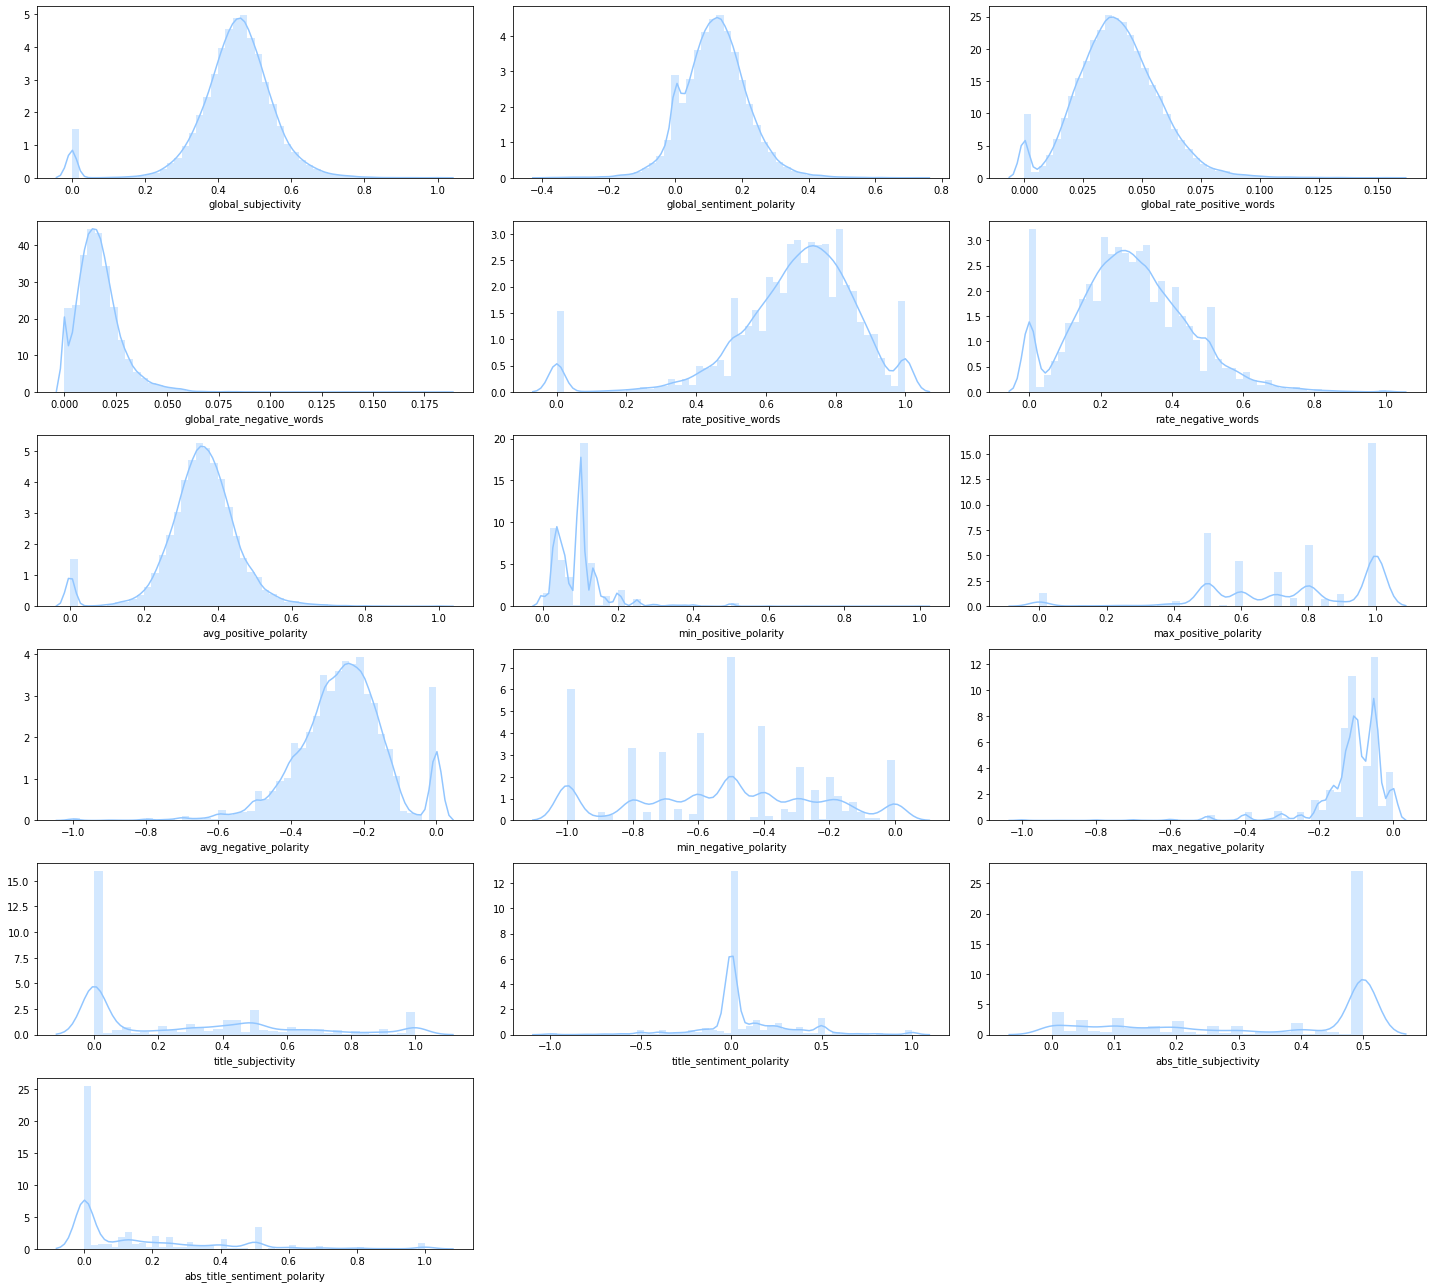

In [17]:
plt.figure(figsize=(20,18))
hlp.grid_plot_batch(sentiments, 3, sns.distplot)

Los atributos que representan sentimientos positivos, negativos, subjetividad y polaridad tienen, la mayoría, más de 1 moda y en general presentan distribución con normal.

No podemos determinar visualmente correlación, no obstante lo veremos más adelante.

> __lda__ (Latent Dirichlet Allocation)

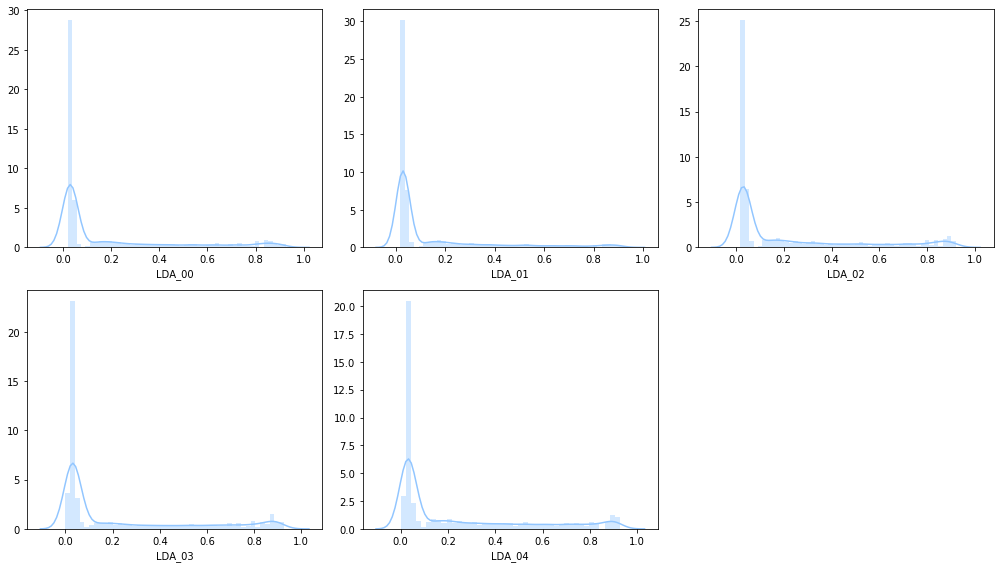

In [18]:
hlp.grid_plot_batch(lda, 3, sns.distplot)

Estos atributos __lda__ determinan el % de pertenencia a cierto tópico. Existen 5 tópicos identificados. La moda en todas las variables está en valores cercanos al 0.

Podemos sospechar cierta correlación, no obstante vamos a determinarlo más adelante.

> __keywords__

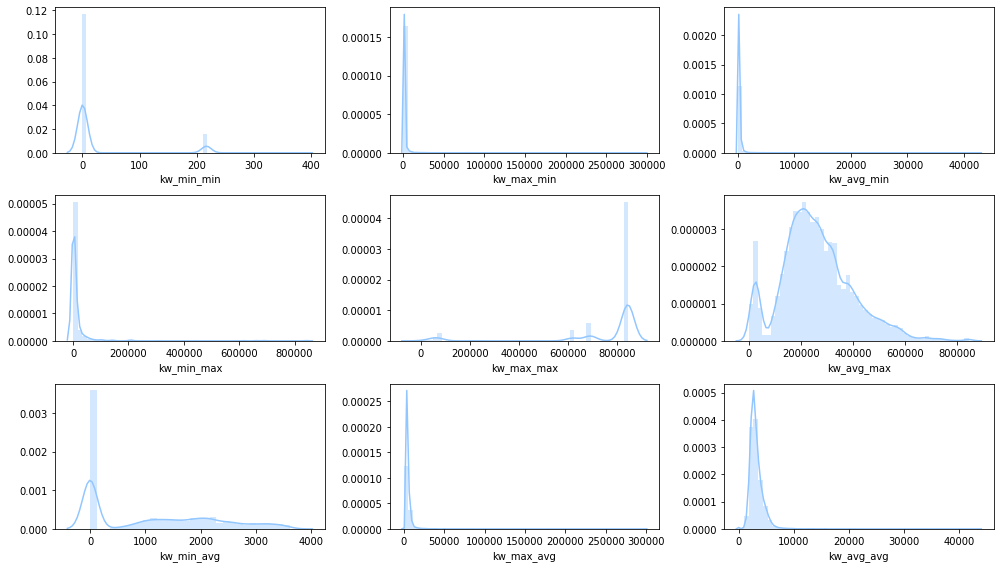

In [19]:
hlp.grid_plot_batch(keywords, 3, sns.distplot)

Los atributos relacionados a la densidad de palabras claves (keywords) tienen una moda pronunciada bordeando el 0.

* Dada la naturaleza de los atributos, es probable que algunas mediciones estén correlacionadas entre sí. Para ello, genere un diagnóstico previo de multicolinealidad utilizando la función identify_high_correlations que se encuentra en el archivo helpers.py . Para todos aquellos atributos que tengan una correlación de .8, reporte sus nombres.


In [20]:
# Se revisa la multicolinealidad de las variables utilizando identify_high_correlations
hlp.identify_high_correlations(df, .8)

,variable,var2,value
179,n_non_stop_words,n_unique_tokens,0.999572
238,n_non_stop_unique_tokens,n_unique_tokens,0.999852
239,n_non_stop_unique_tokens,n_non_stop_words,0.999532
1139,kw_avg_min,kw_max_min,0.940529
1256,kw_max_max,kw_min_min,-0.857226
1499,kw_avg_avg,kw_max_avg,0.811864
1678,self_reference_avg_sharess,self_reference_min_shares,0.818907
1679,self_reference_avg_sharess,self_reference_max_shares,0.853480
2317,LDA_02,data_channel_is_world,0.836618


* Antes de generar los conjuntos de entrenamiento y validación, preprocese los datos con los siguientes pasos:
  * Recodifique la variable shares en una variable binaria que identifique como 1 todos los registros con más de 1400 "compartir" y 0 de lo contrario. Para evitar multicolinealidad, elimine la variable shares posteriormente.
  * Elimine todas las variables que presentaban una correlación mayor a .8. Este paso es para evitar la multicolinealidad de los atributos.
  * Genere un análisis de Componentes Principales para extraer las principales 30 dimensiones. Guarde estas dimensiones en un nuevo objeto.

> Recodificamos shares

In [21]:
# Binarizamos shares, donde 1 es más de 1400 y 0 lo contrario
df['shares_bin'] = np.where(df['shares']>1400, 1, 0)
# Se elimina la columna original
df.drop(columns='shares', inplace=True)

> Eliminamos atributos altamente correlacionados (> |0.8|)

In [22]:
# Se seleccionan las columnas con correlación mayor a 0.8
col_delete = hlp.identify_high_correlations(df, .8)['var2']
# Se eliminan las columnas del df
df.drop(columns=col_delete, inplace = True)

> Análisis de componentes principales, extraemos 30 dimensiones

In [23]:
X = df.drop(columns='shares_bin')
y = df.loc[:, 'shares_bin']

In [24]:
X_pca = PCA(n_components=30, random_state=14173).fit_transform(X)
# Reviso la estructura del objeto de 30 dimensiones
X_pca.shape

(39644, 30)

## Ejercicio 2 - Evaluación de modelos individuales
* A continuación generará una serie de modelos que se incorporarán posteriormente al comité de votación. Para ello, se solicita que:
    * Importe los módulos correctamente.
    * Para cada uno de ellos, genere un reporte en las métricas de desempeño respecto a Precision , Recall , F1 . Puede hacer uso de la función plot_classification_report disponible en el archivo helpers.py .
    * Comente el desempeño general de cada uno
* La lista de modelos es la siguiente. Cabe destacar que la mayoría de éstos corresponden a implementaciones vanilla, salvo que se indique lo contrario:
    * Regresión Logística.
    * Algoritmo de KMedias.
    * Árbol de Clasificación con un max_depth=1 .
    * Árbol de Clasificación con un max_depth=4 .

In [25]:
# Utilizaré el nuevo objeto con 30 dimensiones para entrenar los modelos
# Estandarizo los valores para suavizar los rangos de los datos
X_std = StandardScaler().fit_transform(X_pca)

In [26]:
# Separo la muestra de datos
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = .33, random_state = 14173)

In [27]:
print(f'Registros training: {X_train.shape[0]} / Atributos training:{X_train.shape[1]}')
print(f'Registros testing: {X_test.shape[0]} / Atributos testing:{X_test.shape[1]}')

Registros training: 26561 / Atributos training:30
Registros testing: 13083 / Atributos testing:30


In [28]:
# definimos el comité de clasificadores
estimators = [('Logistic_Regression',LogisticRegression(random_state=14173)),
              ('Kmeans', KMeans(random_state=14173)),
              ('DTC_max_deph_1',DecisionTreeClassifier(max_depth=1, random_state=14173)),
              ('DTC_max_deph_4',DecisionTreeClassifier(max_depth=4, random_state=14173))]

In [29]:
estimators

[('Logistic_Regression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=14173, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('Kmeans',
  KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
         n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
         random_state=14173, tol=0.0001, verbose=0)),
 ('DTC_max_deph_1',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort=False,
                         random_state=14173, split

Logistic_Regression
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      6626
           1       0.65      0.63      0.64      6457

    accuracy                           0.65     13083
   macro avg       0.65      0.65      0.65     13083
weighted avg       0.65      0.65      0.65     13083

Kmeans
              precision    recall  f1-score   support

           0       0.53      0.18      0.26      6626
           1       0.48      0.31      0.38      6457
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.24     13083
   macro avg       0.14      0.07      0.09     13083
weighted avg       0.50      0.24      0.32     13083

DTC_max_deph_1
              precision    recall 

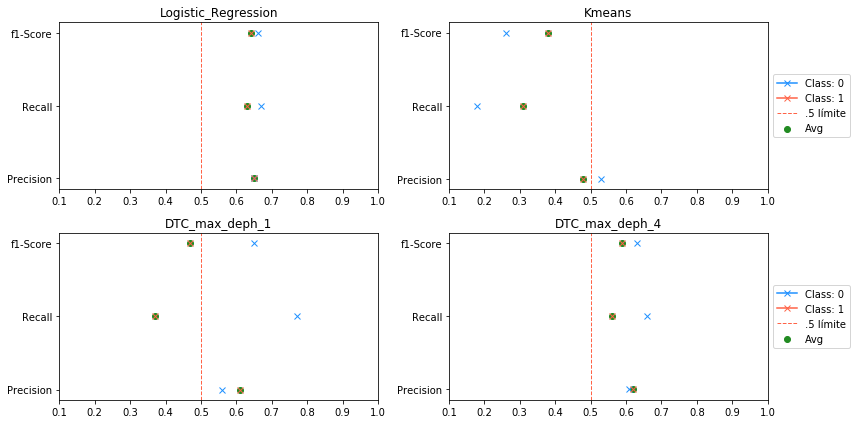

In [30]:
plt.figure(figsize=(12,6))
for index, value in enumerate(estimators):
    class_pred = value[1].fit(X_train, y_train).predict(X_test)
    print(value[0])
    print(classification_report(y_test, class_pred))
    plt.subplot(2, 2, index + 1)
    plt.title(value[0])
    hlp.plot_classification_report(y_test, class_pred)
    plt.tight_layout()
    # Agregamos el benchmark global / clasificador aleatoreo
    plt.axvline(.5, color='tomato', linestyle='--', lw=1, label=".5 límite")
    plt.xlim((0.1, 1.0))
    if (index + 1) % 2 == 0:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    

Podemos observar que tanto el modelo de Regresión Logística (__Logistic_Regression__) como el Árbol de decisión con 4 niveles (__DTC_max_deph_4__) son los que presentan mejor desempeño, comparandolos con un clasificador aleatoreo. Ambos modelos presentan desempeños balanceados entre las dos clases. En el caso de __Kmeans__ y __DTC_max_deph_1__ se comportan peor que un clasificador aleatoreo.

## Ejercicio 3 - Entrenamiento de Comité
* Entrene el comité de clasificadores sin modificar el esquema de votación.
* Reporte el desempeño a nivel de cada clase para cada métrica

In [31]:
# Aplicamos el algoritmo de votación usando los 4 modelos antes revisados
voting_classifier = VotingClassifier(estimators).fit(X_train, y_train)
y_hat=voting_classifier.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.60      0.76      0.67      6626
           1       0.66      0.47      0.55      6457

    accuracy                           0.62     13083
   macro avg       0.63      0.62      0.61     13083
weighted avg       0.63      0.62      0.61     13083



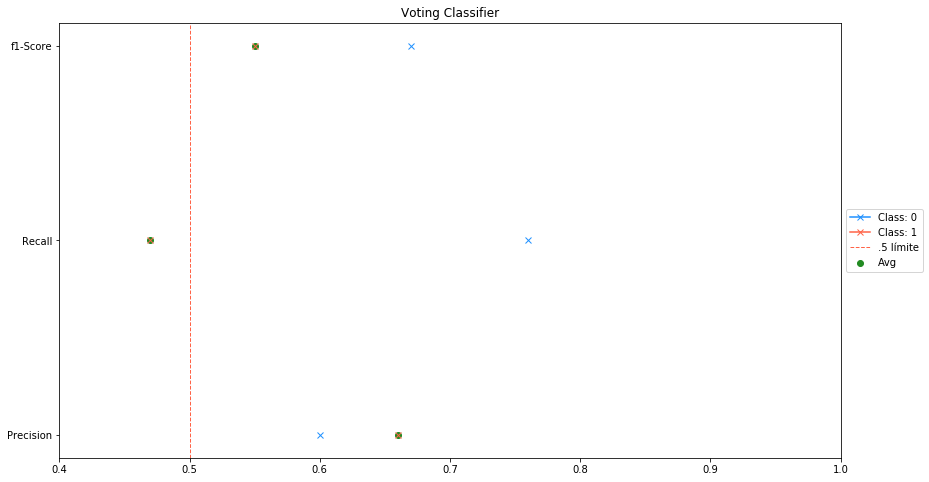

In [32]:
hlp.plot_classification_report(y_test,y_hat)
plt.xlim((0.4, 1.0))
plt.axvline(.5, color='tomato', linestyle='--', lw=1, label=".5 límite")
plt.title('Voting Classifier');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

Podemos observar que tanto f1 como recall de la clase 0 mejoran levemente respecto a los modelos con mejor desempeño, no obstante la clase 1 sufrió una pérdida respecto los mejores modelos anteriores. Vamos a ver si podemos mejorar el modelo calibrando el comité con ponderadores.

## Ejercicio 4 - Calibración de Comité con Ponderadores
* El base al comportamiento de los clasificadores individuales del ensamble, proponga dos esquemas de ponderación para mejorar el desempeño del modelo. 
* Reporte el desempeño del mejor ensamble heterogéneo.

El peor desempeño lo tiene el modelo KMeans, por lo tanto será castigado al 1%.

El primer esquema presentará el castigo de KMeans al 1% y el resto de los modelos estarán en proporción equivalente.

El segundo esquema presentará el castigo de KMeans y un aumento en la ponderación a los dos mejores modelos (Regresión Logistica y DTC 4 niveles)

In [33]:
# Se define el diccionario con el esquema de ponderación
weights_hyperparams = {'Equiprobable':[.25,.25,.25,.25],
                       'Castigo KM':[.33, .01, .33, .33], 
                       'Castigo KM y Premio LR y Más DTC-4': [.4, .01, .19, .4]}

<Figure size 720x720 with 0 Axes>

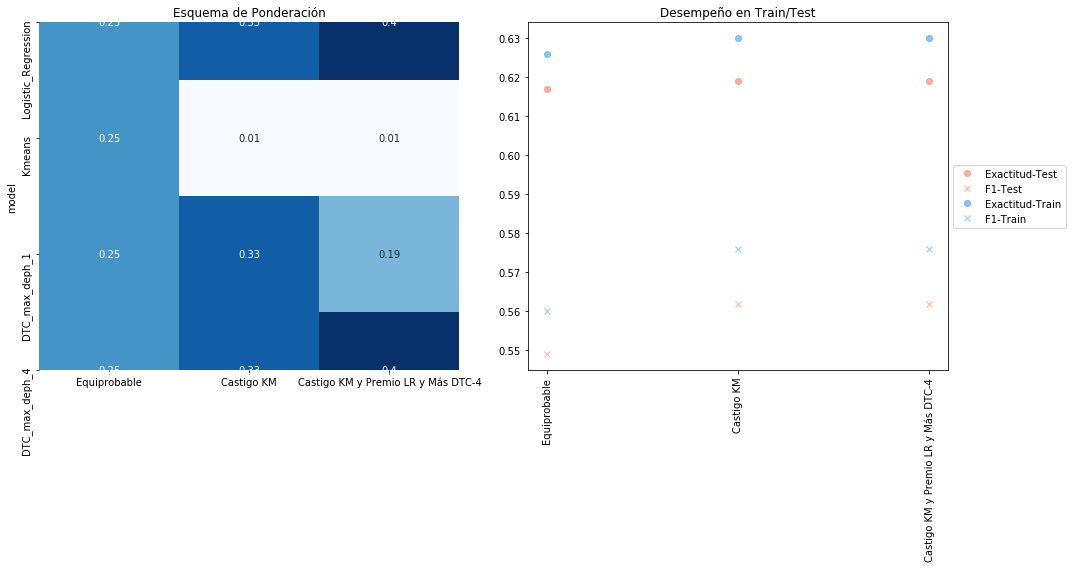

In [34]:
plt.figure(figsize=(10, 10))
# implementamos la evaluación del modelo
plt.figure(figsize=(15,8))
lecfx.weighting_schedule(voting_classifier, 
                         X_train, 
                         X_test, 
                         y_train, 
                         y_test, 
                         weights_hyperparams)
plt.tight_layout();

In [35]:
y_hat = VotingClassifier(estimators, 
                         weights=weights_hyperparams['Equiprobable']
                        ).fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.60      0.76      0.67      6626
           1       0.66      0.47      0.55      6457

    accuracy                           0.62     13083
   macro avg       0.63      0.62      0.61     13083
weighted avg       0.63      0.62      0.61     13083



In [37]:
y_hat = VotingClassifier(estimators, 
                         weights=weights_hyperparams['Castigo KM']
                        ).fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.60      0.74      0.66      6626
           1       0.65      0.50      0.56      6457

    accuracy                           0.62     13083
   macro avg       0.62      0.62      0.61     13083
weighted avg       0.62      0.62      0.61     13083



In [38]:
y_hat = VotingClassifier(estimators, 
                         weights=weights_hyperparams['Castigo KM y Premio LR y Más DTC-4']
                        ).fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.60      0.74      0.66      6626
           1       0.65      0.50      0.56      6457

    accuracy                           0.62     13083
   macro avg       0.62      0.62      0.61     13083
weighted avg       0.62      0.62      0.61     13083



El problema del modelo sin calibrar los ponderadores era que la clase 1 presentaba valores de recall peores que un clasificador aleatoreo. Al castigar el modelo con desempeño muy errático mejoramos el balance de las clases y ahora el nuevo comité presenta valores superiores a un clasificador aleatoreo.